# Case - Retail 
![](https://industrywired.com/wp-content/uploads/2020/02/How_Supply-Chain-Automation-Affects-Retail-Industry.jpg)
[source:](https://industrywired.com/how-supply-chain-automation-affects-retail-industry/)

Slides Presentation: [Kaggle Days Meetup Delhi NCR- CaesarLupum](https://docs.google.com/presentation/d/e/2PACX-1vTA0kAKbN7BsweHXIZaeaTwdF2ySpgCb-Hy_b3dEA4eq7Txso3bRx2n2c_bCBOzlbOWb1kqxUmGfyD1/pub?start=false&loop=false&delayms=3000)


### You are responsible for the analysis that will serve as a foundation for the strategy of entering the Brazilian market of a large multinational retailer in the supermarket sector. 
* TASK 1 - Classify Brazilian municipalities based on the available information 
* TASK 2 - Develop a classification model to calculate the probability that a given municipality belongs to one of the groups created.
* Which groups of municipalities should be the gateway to a company in the country? Why?



## Meetup #17 || Applying Factor Analysis in Classification Problems

In [1]:
# Suppress warnings 
import warnings
warnings.filterwarnings("ignore", category=DeprecationWarning)
warnings.filterwarnings("ignore", category=UserWarning)
warnings.filterwarnings("ignore", category=FutureWarning)
from IPython.display import HTML


HTML('<iframe width="1280" height="720" src="https://www.youtube.com/embed/cP9gOrNssOA" frameborder="0" allow="accelerometer; autoplay; clipboard-write; encrypted-media; gyroscope; picture-in-picture" allowfullscreen></iframe>')



# Import libs

In [2]:
import warnings
warnings.filterwarnings("ignore", category=DeprecationWarning)
warnings.filterwarnings("ignore", category=UserWarning)
warnings.filterwarnings("ignore", category=FutureWarning)
# This Python 3 environment comes with many helpful analytics libraries installed
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
from pandas import read_excel


pd.set_option('max_columns', 6000)

[Factor Analysis library](https://pypi.org/project/factor-analyzer/) - python
-> factor-analyzer 0.3.2

In [3]:
# Installing the factor_analyzer library to test factor analysis.
!pip install factor_analyzer


     |████████████████████████████████| 40 kB 1.0 MB/s 
  Created wheel for factor-analyzer: filename=factor_analyzer-0.3.2-py3-none-any.whl size=40380 sha256=57b9d18be33a17a29869f8dfa2771a16b9e237cfec7c10e3480357670542b787
  Stored in directory: /root/.cache/pip/wheels/8d/9e/4c/fd4cb92cecf157b13702cc0907e5c56ddc48e5388134dc9f1a
Successfully built factor-analyzer
You should consider upgrading via the '/opt/conda/bin/python3.7 -m pip install --upgrade pip' command.


In [4]:
# import factor analyzer library
from factor_analyzer import FactorAnalyzer

# import hierarchical clustering libraries
import scipy.cluster.hierarchy as sch
from sklearn.cluster import AgglomerativeClustering

from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report, precision_score
from sklearn.pipeline import Pipeline
from sklearn import preprocessing
from sklearn.metrics import silhouette_score

from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import f1_score

from sklearn.metrics import multilabel_confusion_matrix # interresting approach for multilabel
from sklearn.metrics import confusion_matrix

from sklearn.svm import LinearSVC
from sklearn.metrics import accuracy_score, recall_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.model_selection import cross_val_score
from sklearn.multiclass import OneVsOneClassifier
from sklearn.multioutput import MultiOutputRegressor
from sklearn.multiclass import OneVsRestClassifier
from numpy import mean, std

import seaborn as sns
import matplotlib.pyplot as plt


## Glimpse of Data

dataset from ibope inteligencia.

> Dataset with >5000 Brazilian municipalities, 23 measures.

### Columns: 
- Area (km²)'
- 'Demographic density, 2000'
- 'Distance to capital (km)'
- 'Life expectancy at birth, 2000'
- 'Mortality to one year old, 2000'
- 'Total fertility rate, 2000'
- 'Percentage of people aged 25 and over who are illiterate, 2000'
- 'Income per Capita, 2000'
- 'Gini Index, 2000'
- 'Intensity of indigence, 2000'
- 'Intensity of poverty, 2000'
- 'Municipal Human Development Index, 2000'
- 'Gross school attendance rate, 2000'
- 'Literacy rate, 2000'
- 'Average years of schooling for people aged 25 or over, 2000'
- 'Population aged 25 or over, 1991'
- 'Population aged 25 or over, 2000'
- 'Population aged 65 and over, 1991'
- 'Population aged 65 and over, 2000'
- 'Total population, 1991'
- 'Total population, 2000'
- 'Urban population, 2000'
- 'Rural population, 2000'

In [5]:
file_name = '/kaggle/input/ibopedtm/Case - Data Science IBOPE.XLS'
sheet_name = 'Informações_Municipais'
df_ibope = read_excel(file_name, sheet_name=sheet_name, header=3)
df_ibope = df_ibope.drop(['Código'], 1)
df_ibope = df_ibope.set_index('Município')

In [6]:
df_ibope.rename(columns={'Área (km²)':'Área (km²)', 'Densidade demográfica, 2000':'Demographic density, 2000', 'Distância à capital (km)':'Distance to capital (km)',
       'Esperança de vida ao nascer, 2000':'Life expectancy at birth, 2000',
       'Mortalidade até um ano de idade, 2000':'Mortality to one year old, 2000',
       'Taxa de fecundidade total, 2000':'Total fertility rate, 2000',
       'Percentual de pessoas de 25 anos ou mais analfabetas, 2000':'Percentage of people aged 25 and over who are illiterate, 2000',
       'Renda per Capita, 2000':'Income per Capita, 2000', 'Índice de Gini, 2000':'Gini Index, 2000',
       'Intensidade da indigência, 2000':'Intensity of indigence, 2000', 'Intensidade da pobreza, 2000':'Intensity of poverty, 2000',
       'Índice de Desenvolvimento Humano Municipal, 2000':'Municipal Human Development Index, 2000',
       'Taxa bruta de freqüência à escola, 2000':'Gross school attendance rate, 2000',
       'Taxa de alfabetização, 2000':'Literacy rate, 2000',
       'Média de anos de estudo das pessoas de 25 anos ou mais de idade, 2000':'Average years of schooling for people aged 25 or over, 2000',
       'População de 25 anos ou mais de idade, 1991':'Population aged 25 or over, 1991',
       'População de 25 anos ou mais de idade, 2000':'Population aged 25 or over, 2000',
       'População de 65 anos ou mais de idade, 1991':'Population aged 65 and over, 1991',
       'População de 65 anos ou mais de idade, 2000':'Population aged 65 and over, 2000', 'População total, 1991':'Total population, 1991',
       'População total, 2000':'Total population, 2000', 'População urbana, 2000':'Urban population, 2000',
       'População rural, 2000':'Rural population, 2000'}, inplace=True)

In [7]:
print("Data Description", df_ibope.shape)

Data Description (5507, 23)


### Checking missing data in train
number and percentage of missing values in each column.

In [8]:
total = df_ibope.isnull().sum().sort_values(ascending = False)
percent = (df_ibope.isnull().sum()/df_ibope.isnull().count()*100).sort_values(ascending = False)
missing_train_data  = pd.concat([total, percent], axis=1, keys=['Total', 'Percent'])
missing_train_data.head()

,Total,Percent
"Rural population, 2000",0,0.0
"Intensity of poverty, 2000",0,0.0
"Demographic density, 2000",0,0.0
Distance to capital (km),0,0.0
"Life expectancy at birth, 2000",0,0.0


### Column Type

In [9]:
df_ibope.dtypes.value_counts()

float64    15
int64       8
dtype: int64

### Duplicate values
Let's now check how many duplicate values exists per columns.


In [10]:
features = df_ibope.columns.values[1:11]
unique_max = []
for feature in features:
    values = df_ibope[feature].value_counts()
    unique_max.append([feature, values.max(), values.idxmax()])
np.transpose((pd.DataFrame(unique_max, columns=['Feature', 'Max duplicates', 'Value'])).\
            sort_values(by = 'Max duplicates', ascending=False).head(10))    

,7,4,1,0,2,3,8,9,5,6
Feature,"Gini Index, 2000","Total fertility rate, 2000",Distance to capital (km),"Demographic density, 2000","Life expectancy at birth, 2000","Mortality to one year old, 2000","Intensity of indigence, 2000","Intensity of poverty, 2000",Percentage of people aged 25 and over who are ...,"Income per Capita, 2000"
Max duplicates,407,60,27,23,19,13,11,8,6,4
Value,0.56,2.23,0,1.7,64.87,45.39,20,40.93,13.37,85.15


In [11]:
df_ibope.head()

,Área (km²),"Demographic density, 2000",Distance to capital (km),"Life expectancy at birth, 2000","Mortality to one year old, 2000","Total fertility rate, 2000","Percentage of people aged 25 and over who are illiterate, 2000","Income per Capita, 2000","Gini Index, 2000","Intensity of indigence, 2000","Intensity of poverty, 2000","Municipal Human Development Index, 2000","Gross school attendance rate, 2000","Literacy rate, 2000","Average years of schooling for people aged 25 or over, 2000","Population aged 25 or over, 1991","Population aged 25 or over, 2000","Population aged 65 and over, 1991","Population aged 65 and over, 2000","Total population, 1991","Total population, 2000","Urban population, 2000","Rural population, 2000"
Município,,,,,,,,,,,,,,,,,,,,,,,
Abadia de Goiás (GO),136.9,36.3,21.414308,67.58,27.70,2.85,15.64,205.27,0.53,36.89,34.40,0.742,80.17,88.03,4.87,1872,2433,121,227,4227,4971,3096,1875
Abadia dos Dourados (MG),897.4,7.2,390.876513,72.92,20.51,2.54,14.48,196.36,0.52,51.90,35.22,0.760,74.57,86.58,4.36,3308,3781,354,459,6492,6446,3927,2519
Abadiânia (GO),1047.7,10.9,78.641435,69.59,22.36,2.77,21.81,168.31,0.56,47.06,40.32,0.723,74.18,82.45,4.24,4241,5918,446,686,9402,11452,7206,4246
Abaetetuba (PA),1613.9,73.8,51.184552,70.77,25.61,3.15,24.85,102.14,0.59,44.61,51.04,0.706,81.76,80.74,4.28,33554,44897,3792,4688,99989,119152,70843,48309
Abaeté (MG),1822.4,12.3,172.311549,72.50,21.59,2.41,15.56,253.68,0.58,41.53,31.68,0.778,78.39,87.55,4.78,10163,12406,1084,1595,20689,22360,19022,3338


# Factor Analysis
CONDUCTING FACTOR ANALYSIS
- PROBLEM FORMULATION
    - Classify Brazilian municipalities based on the available information 
    - Develop a classification model to calculate the probability that a given municipality belongs to one of the groups created.
- CONSTRUCTION OF CORRELATION MATRIX
- METHOD OF FACTOR ANALYSIS
- DETERMINATION OF NUMBER OF FACTORS
- ROTATION OF FACTORS
- INTERPRETATION OF FACTORS
    -  Interpret Factors(A factor can be interpreted in terms of the variables that load high on it. )

### What is the Factor Analysis?
> Factor analysis is a statistical method used to describe variability among observed, correlated variables in terms of a potentially lower number of unobserved variables called factors.
>  Factor analysis involves grouping similar variables into dimensions.  This process is used to identify latent variables or constructs.  The purpose of factor analysis is to reduce many individual items into a fewer number of dimensions.

![image.png](https://res.cloudinary.com/dchysltjf/image/upload/f_auto,q_auto:best/v1554830233/1.png)
[source](https://www.datacamp.com/community/tutorials/introduction-factor-analysis)

We will use Factor Analysis in order to identify latent factors in the variables, we want to know which variables influence the data the most.

# Next, we will use these factors to identify the most significant clusters for the multinational retailer in our case.

# Correlations
Now that we have dealt with the categorical variables and the outliers, let's continue with the EDA. One way to try and understand the data is by looking for correlations between the features and the target. We can calculate the Pearson correlation coefficient between every variable and the target using the .corr dataframe method.

The correlation coefficient is not the greatest method to represent "relevance" of a feature, but it does give us an idea of possible relationships within the data. Some [general interpretations of the absolute value of the correlation coefficent are](http://www.statstutor.ac.uk/resources/uploaded/pearsons.pdf):

- .00-.19 “very weak”
- .20-.39 “weak”
- .40-.59 “moderate”
- .60-.79 “strong”
- .80-1.0 “very strong”

<Figure size 1800x3600 with 0 Axes>

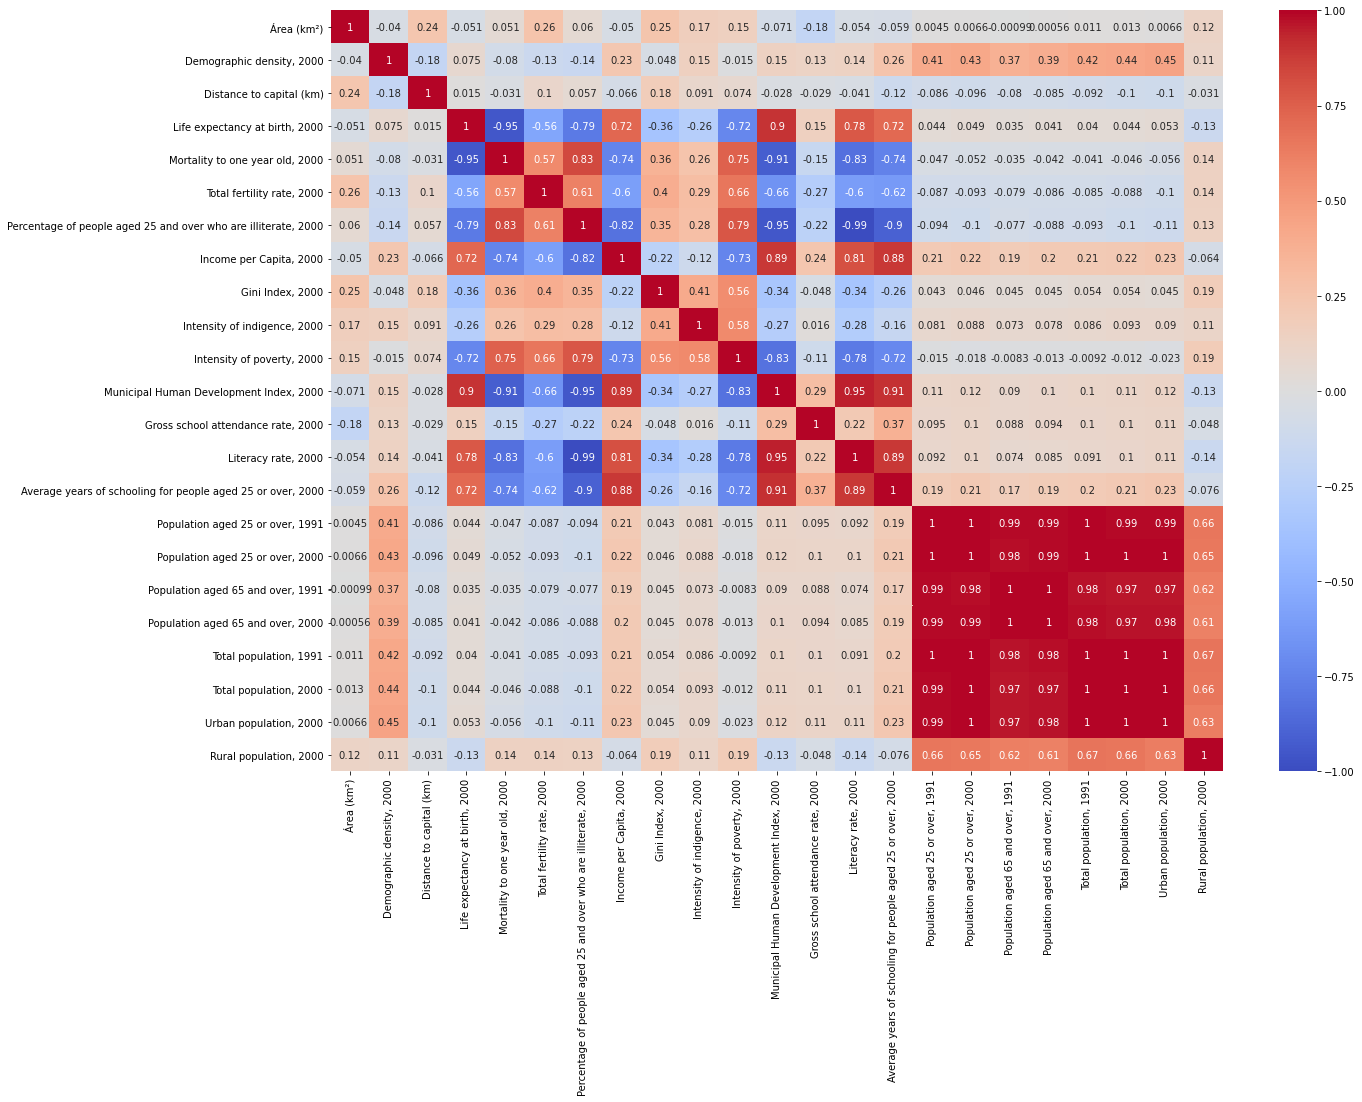

In [12]:

# =============================Factor Analysis==================================

# Plot correlation matrix of indicators
plt.figure(figsize=(25,50))
subjective_corr = df_ibope.corr()
plt.figure(figsize=(20, 14))
sns.heatmap(subjective_corr,
            vmin=-1,
            cmap='coolwarm',
            annot=True);

## Correlation between Municipalities

In the graph below we can see a correlation between municipalities.

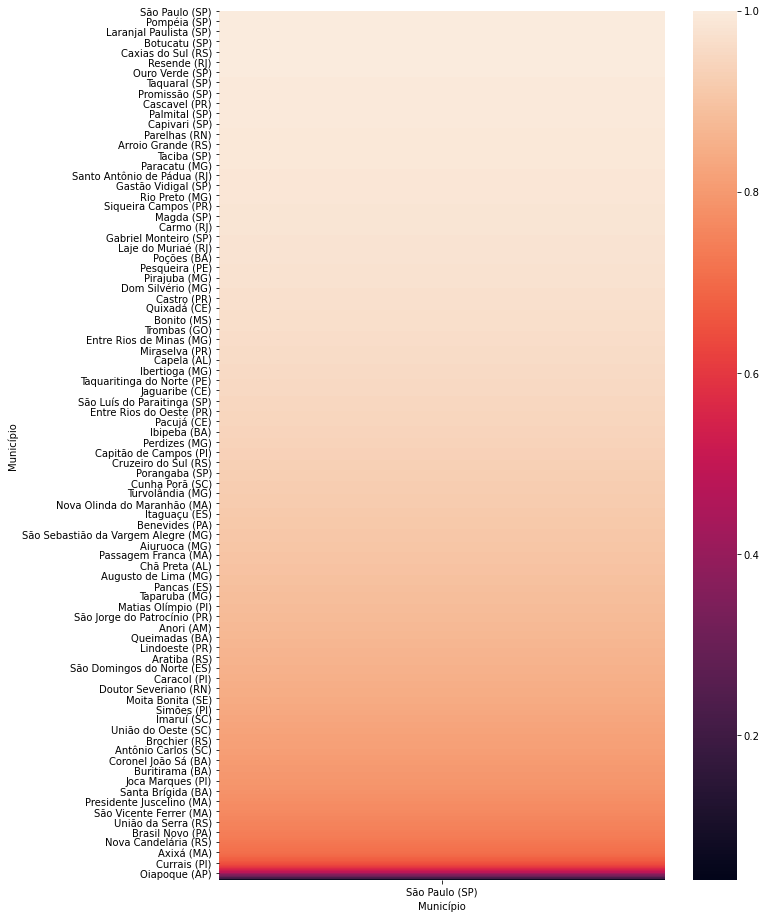

In [13]:

def plot_corr_municipio(municipio_name):
    plt.figure(figsize=(10,16))
    subjective_corr = df_ibope.T.corr()
    sns.heatmap(subjective_corr[[municipio_name]].sort_values(by=[municipio_name],ascending=False));
    
plot_corr_municipio('São Paulo (SP)')

### Adequacy Test

Before you perform factor analysis, you need to evaluate the “factorability” of our dataset. Factorability means "can we found the factors in the dataset?". There are two methods to check the factorability or sampling adequacy:

- Bartlett’s Test
- Kaiser-Meyer-Olkin Test

### Kaiser-Meyer-Olkin (KMO)
Test measures the suitability of data for factor analysis. 
If the Kaiser-Meyer-Olkin (KMO) measure of sampling adequacy is small, then the correlations between pairs of variables cannot be explained by other variables and factor analysis may not be appropriate. 
KMO values range between 0 and 1. Value of KMO less than 0.6 is considered inadequate.

In [14]:
from factor_analyzer.factor_analyzer import calculate_kmo
kmo_all,kmo_model=calculate_kmo(df_ibope)
kmo_model

0.7749964427404167

This value indicates that you can proceed with your planned factor analysis.

### Choosing the Number of Factors
For choosing the number of factors, you can use the Kaiser criterion and scree plot. Both are based on eigenvalues

**Determination Based on Eigenvalues.   Only factors with Eigenvalues greater than 1.0 are retained.**

In [15]:

fa = FactorAnalyzer()
fa.fit(df_ibope, 10)

ev , v = fa.get_eigenvalues()

ev_df = pd.DataFrame(ev, columns=['Original_Eigenvalues'])

print('factors eigenvalues that are greater than one.  ', ev_df[ev_df['Original_Eigenvalues']>=1.0].shape[0])
ev_df

factors eigenvalues that are greater than one.   4


,Original_Eigenvalues
0,8.371190e+00
1,7.024642e+00
2,1.601149e+00
3,1.295001e+00
4,9.515548e-01
5,7.499343e-01
6,6.810415e-01
7,5.460550e-01
8,4.701341e-01
9,4.288572e-01


We need to choose only 4 factors (or unobserved variables).

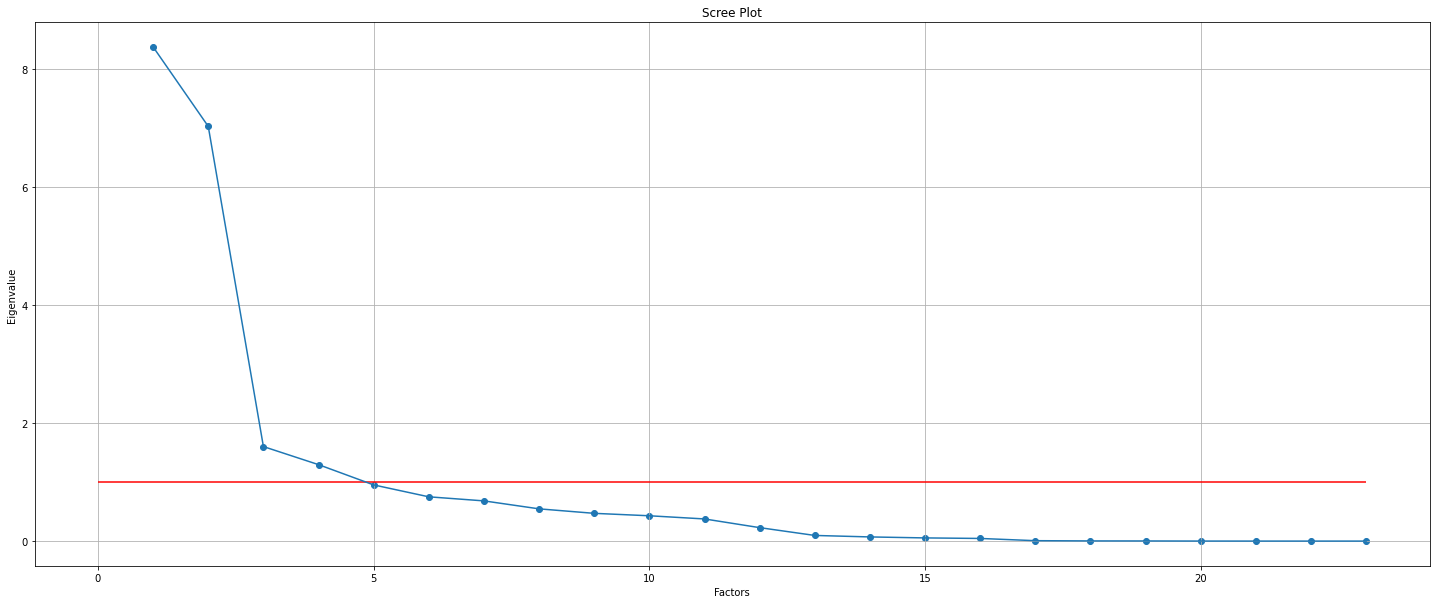

In [16]:
# Create scree plot using matplotlib
plt.figure(figsize=(25,10))
plt.scatter(range(1,df_ibope.shape[1]+1),ev)
plt.plot(range(1,df_ibope.shape[1]+1),ev)
plt.hlines(1, 0, df_ibope.shape[1], colors='r')
plt.title('Scree Plot')
plt.xlabel('Factors')
plt.ylabel('Eigenvalue')
plt.grid()
plt.show()


We have 4 factors with eigenvalues greater than 1, this is our number of factors.

## Performing Factor Analysis

##### Rotation of Factors

#### Varimax procedure. Axes maintained at right angles
	-Most common method for rotation. 
	-An orthogonal method of rotation that minimizes the number of variables with high loadings on a factor. 
	-Orthogonal rotation results in uncorrelated factors.  

##### Oblique rotation. Axes not maintained at right angles
	-Factors are correlated. 
	-Oblique rotation should be used when factors in the population are likely to be strongly correlated.
    
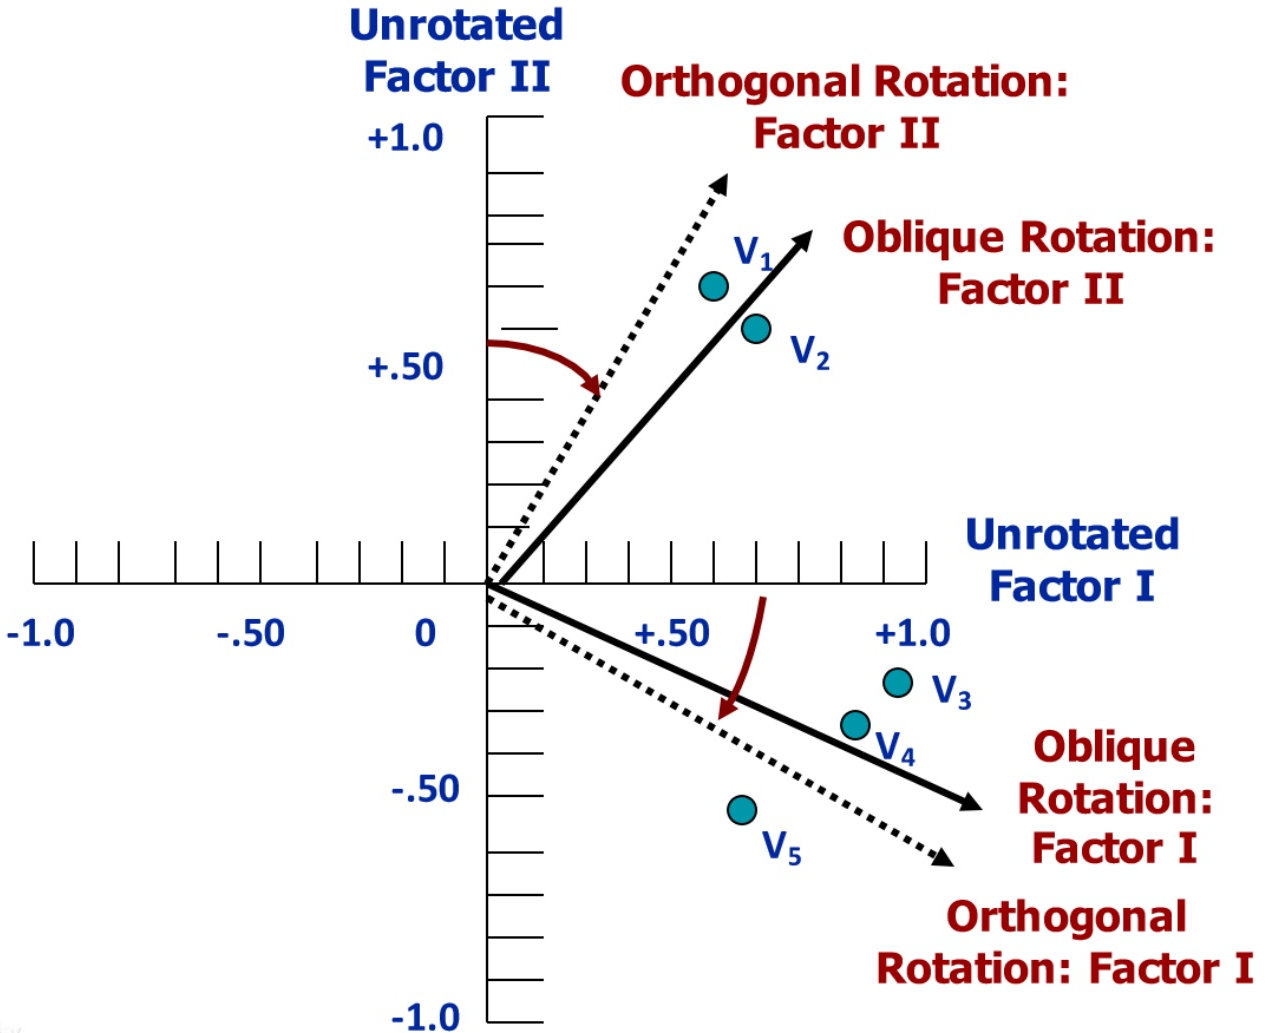
[source](https://devopedia.org/factor-analysis)
  

In [17]:
# Perform Factor Analysis
fa = FactorAnalyzer(n_factors=4, rotation='varimax')
fa.fit(df_ibope)
loads = fa.loadings_
loads = pd.DataFrame(loads, index=df_ibope.T.index)

**varimax**: maximize variance of squared loadings

>0.75 factor loading its 'Good'

>0.5 <=0.75 factor loading its 'Moderage'

<= 0.5 factor loading its 'Low'

Factor with values >0.75, factor loading its 'High'

In [18]:
def color_factor_importance(val):
    if np.abs(val) > 0.75:
        color = 'green'
    elif np.abs(val) > 0.5 and np.abs(val) <= 0.75:
        color = 'blue'
    else: 
        color = 'red'
    return 'color: %s' % color

loads.style.applymap(color_factor_importance)


,0,1,2,3
Área (km²),0.036029,-0.023936,0.171655,0.505444
"Demographic density, 2000",0.378616,0.143807,0.212464,-0.266628
Distance to capital (km),-0.078883,-0.003115,0.069503,0.382842
"Life expectancy at birth, 2000",-0.002158,0.861747,-0.192773,0.080958
"Mortality to one year old, 2000",0.002942,-0.894913,0.188703,-0.092861
"Total fertility rate, 2000",-0.031197,-0.624948,0.206026,0.345975
"Percentage of people aged 25 and over who are illiterate, 2000",-0.033771,-0.945498,0.097026,0.066153
"Income per Capita, 2000",0.145397,0.879045,0.062912,-0.113276
"Gini Index, 2000",0.070691,-0.298525,0.495899,0.318917
"Intensity of indigence, 2000",0.083420,-0.205183,0.654189,0.118386


The higher a factor loading, the more important a variable is for said factor. A loading cutoff of **0.5** will be used here. 
This cutoff determines which variables belong to which factor. For instance, we see that the first factor contains 8 variables.

## Communalities
Determining the communalities** which is the proportion of variability of each variable that is explained by the factors.

Note: The communalities value is the same, regardless of whether you use factorial loads of non-rotated factors or factorial loads of rotated factors for the analysis.

In [19]:
communalities = fa.get_communalities()
communalities = pd.DataFrame(communalities, index=df_ibope.T.index, columns=['communalities'])
communalities.sort_values(by=['communalities'], ascending=True).head(8)

,communalities
Distance to capital (km),0.157631
"Gross school attendance rate, 2000",0.185738
"Demographic density, 2000",0.280261
Área (km²),0.286810
"Gini Index, 2000",0.441738
"Intensity of indigence, 2000",0.491038
"Rural population, 2000",0.504626
"Total fertility rate, 2000",0.553679


# Graph with factorial loads

Now we make an interpretation of each of the generated factors, we observe the values of the factor loads, in the graph we can see that the **Factor 0** has 8 variables with values above abs (50%), whereas **Factor 1** has 9 latent variables above abs (60%), ***Factor 2** has 2 variables above abs (60%) and the **Factor 3** has 1 variable above abs (50%).


We will give an interpretation of each factor based on the highest values of the factor loads in each factor, we will consider values above abs (50%).

note: (hard work rename the factors)
So we have:

##### **Factor 0** Most Populated Municipalities by adults mostly - with variables

- Population aged 25 or over, 1991
- Population aged 25 or over, 2000
- Population aged 65 and over, 1991
- Population aged 65 and over, 2000
- Total population, 1991
- Total population, 2000
- Urban population, 2000
- Rural population, 2000

##### **Factor1 ** Developed Municipalities - with variables

- Life expectancy at birth, 2000
- Mortality to one year old, 2000
- Total fertility rate, 2000
- Percentage of people aged 25 and over who are illiterate, 2000
- Income per Capita, 2000
- Intensity of poverty, 2000
- Municipal Human Development Index, 2000
- Literacy rate, 2000
- Average years of schooling for people aged 25 or over, 2000


       
##### **Factor 2** Less Developed Municipalities - with variables

- Intensity of indigence, 2000
- Intensity of poverty, 2000


##### **Factor 3** Municipalities far from the capital and / or with a large territorial extension and / or with a large area km (** 2) - with variables
- Área (km²)


` note: the naming of the factors is subjective. '', factor 3 its not important for us.

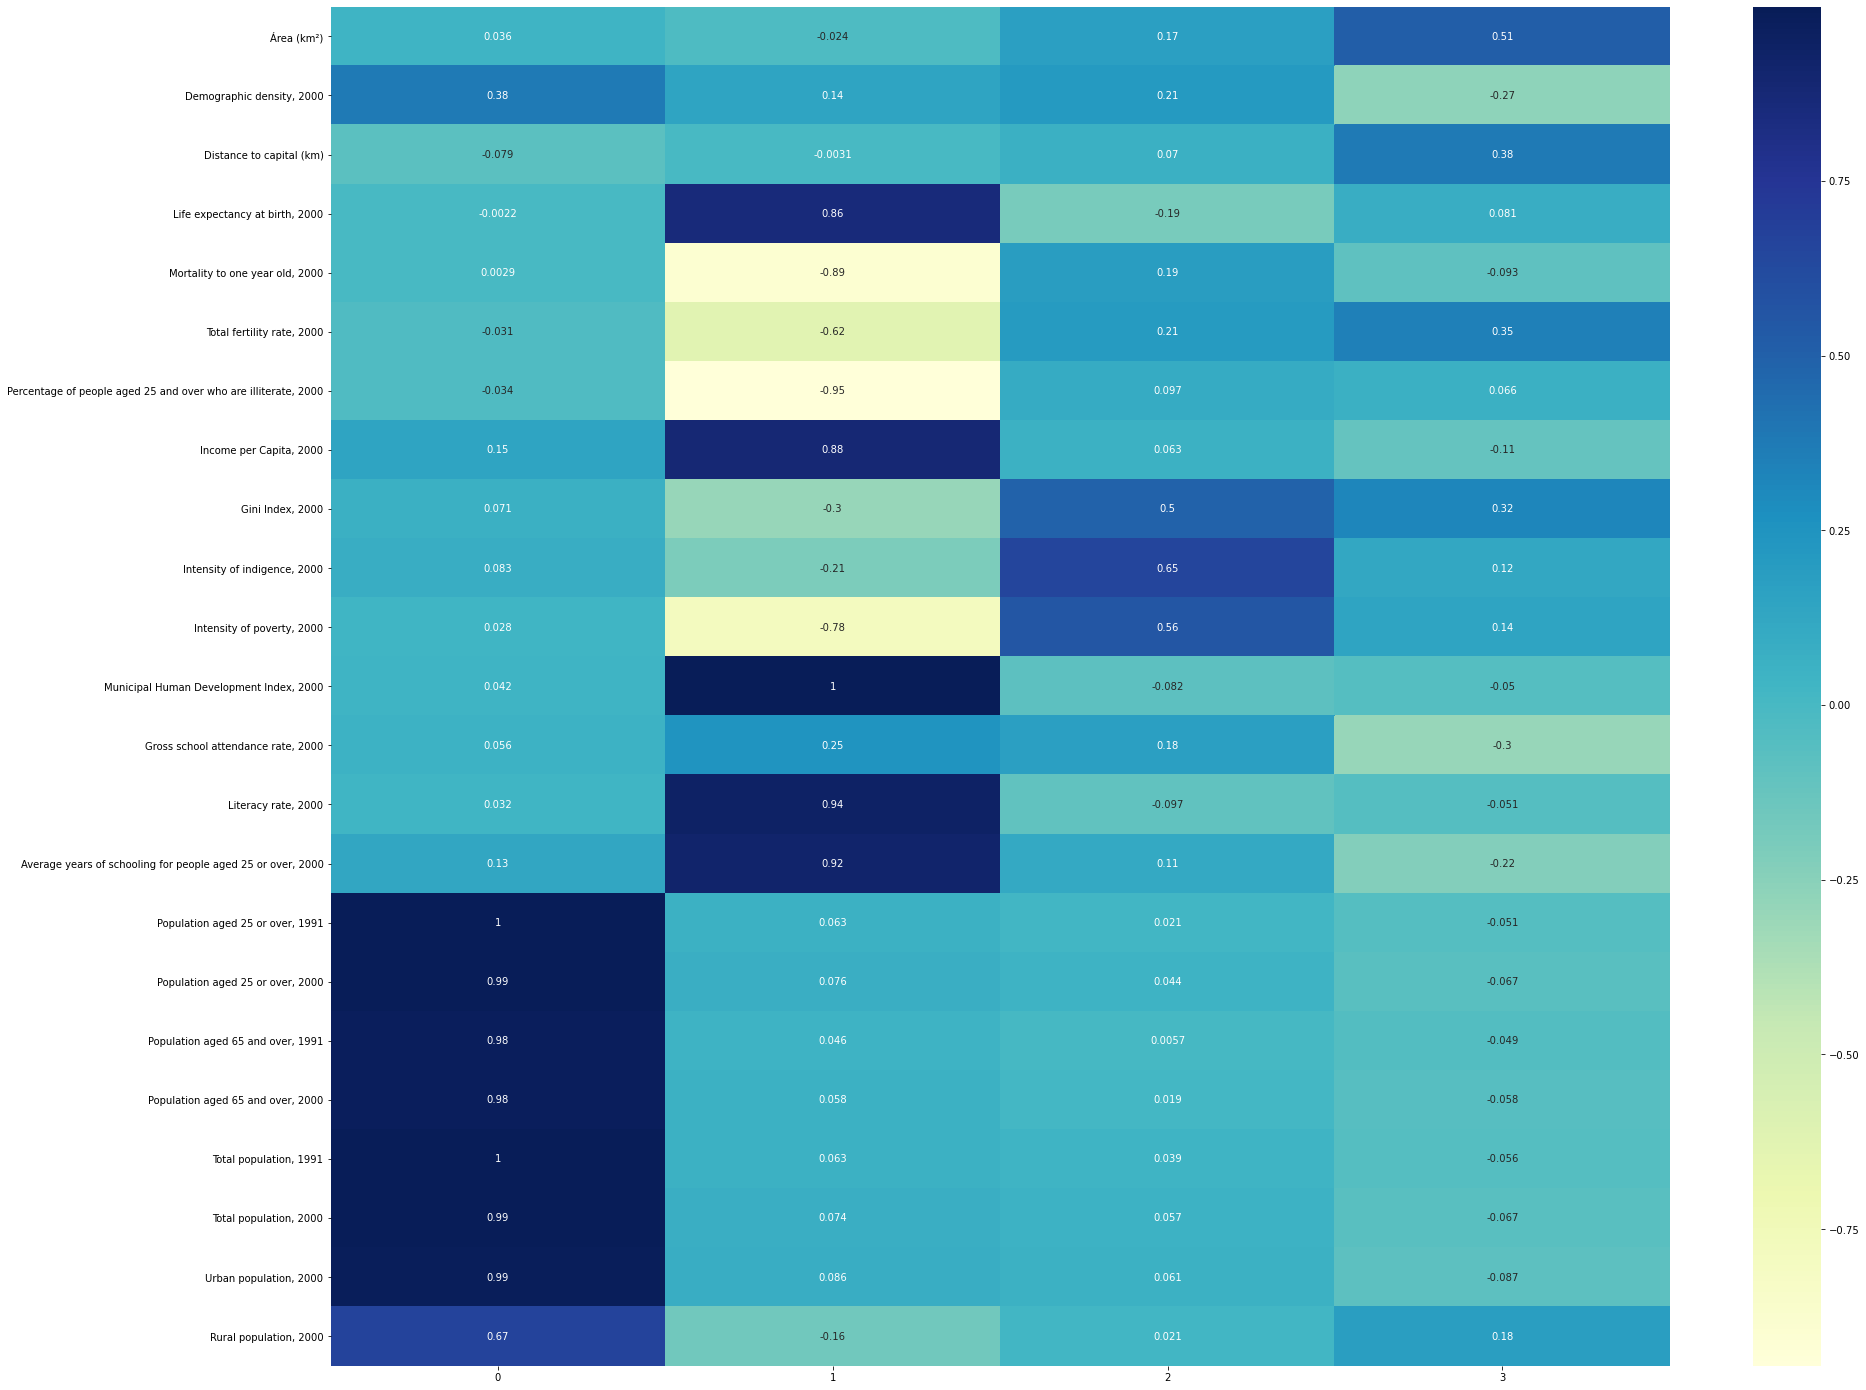

In [20]:
#Heatmap of loadings
plt.figure(figsize=(30,25))
sns.heatmap(loads, annot=True, cmap="YlGnBu")

## * TASK 1 - Classify Brazilian municipalities based on the available information 

# Using clustering

Now we will use algorithms to define the groupings of the municipalities.

### What does KMeans do?

K-means clustering is a type of unsupervised learning, which is used when you have unlabeled data (i.e., data without defined categories or groups). The goal of this algorithm is to find groups in the data, with the number of groups represented by the variable K. 


#### Applications
The K-means clustering algorithm is used to find groups which have not been explicitly labeled in the data. 

In [21]:
from sklearn.cluster import KMeans

#=============================Cluster Analysis KMeans=================================
wcss=[]
for i in range(1,21):
    kmeans = KMeans(n_clusters= i, init='k-means++', random_state=42)
    kmeans.fit(df_ibope)
    wcss.append(kmeans.inertia_)

##### Choosing the right K
The way to evaluate the choice of K is made using a parameter known as WCSS. WCSS stands for Within Cluster Sum of Squares. It should be low. Here's the formula representation for example when K = 3

Summation Distance(p,c) is the sum of distance of points in a cluster from the centroid.
![](https://i.imgur.com/5W63xul.png)

The Elbow Method is then used to choose the best K value. 
Viewing the ELBOW method to obtain the ideal K value (clusters, which is 4)

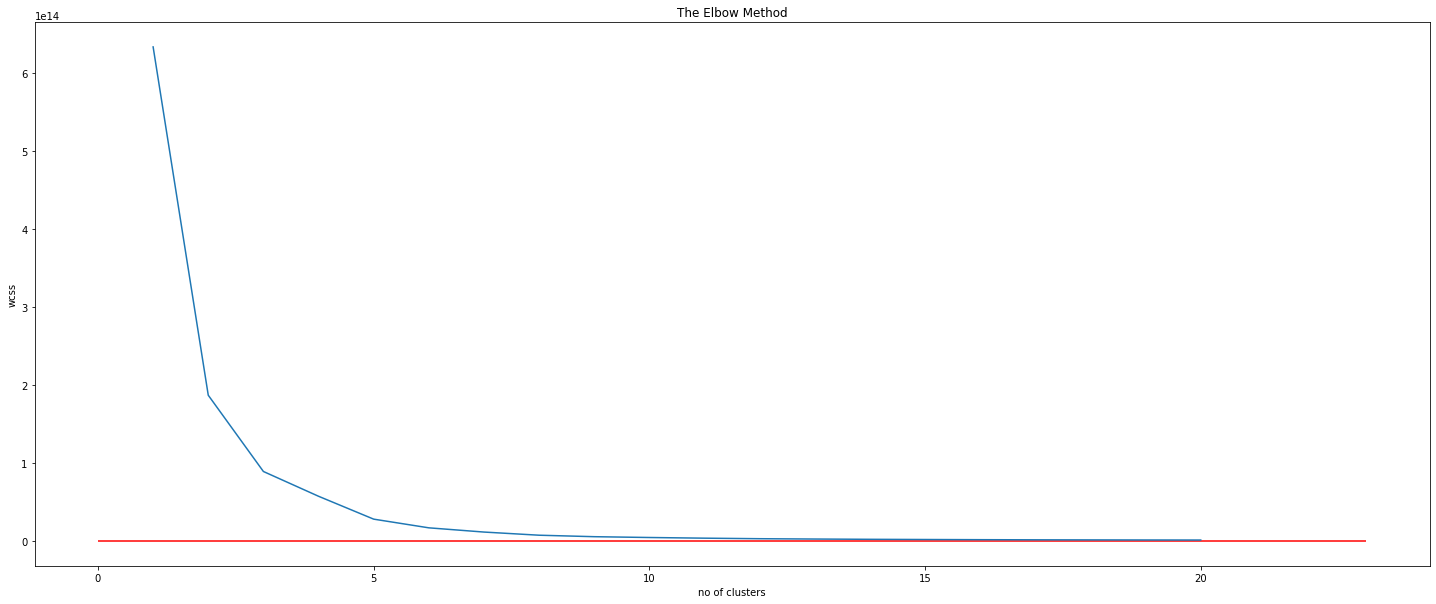

In [22]:

plt.figure(figsize=(25,10))
plt.plot(range(1,21), wcss)
plt.hlines(1, 0, df_ibope.shape[1], colors='r')
plt.title('The Elbow Method')
plt.xlabel('no of clusters')
plt.ylabel('wcss')
plt.show()

In [23]:
#Model Build
kmeansmodel = KMeans(n_clusters= 4, init='k-means++', random_state=42)
y_kmeans= kmeansmodel.fit_predict(df_ibope)
df_ibope['kmeans_cluster'] = y_kmeans

## Standardization
Each indicator has its own scale. For example, the proportion of the **rural population** in total is always greater than the **Municipal HDI**. To avoid that such a difference in scale leads to incomparable weights and unreliable conclusions, we must first standardize the data.

### Result of clustering
4 clusters.

In [24]:
df_ibope['kmeans_cluster'].value_counts()

0    5482
2      23
3       1
1       1
Name: kmeans_cluster, dtype: int64

In [25]:
df_ibope[df_ibope['kmeans_cluster']==1].reset_index()['Município'].values.tolist() , df_ibope[df_ibope['kmeans_cluster']==3].reset_index()['Município'].values.tolist()

(['São Paulo (SP)'], ['Rio de Janeiro (RJ)'])

In [26]:

df_final_T = df_ibope
df_final_T.sort_values("kmeans_cluster", inplace = True, ascending=True)
# standardization along columns
df_final_std_ =(df_ibope-df_ibope.mean())/df_ibope.std()
df_final_std_['kmeans_cluster'] = y_kmeans
df_final_std_.sort_values("kmeans_cluster", inplace = True, ascending=True)

df_cluster_ = df_final_T.groupby('kmeans_cluster').mean()
df_cluster_std_ = df_final_std_.groupby('kmeans_cluster').mean()


In [27]:

# drop single cluster
df_ibope = df_ibope[df_ibope['kmeans_cluster']!=1][df_ibope['kmeans_cluster']!=3]
df_final_T = df_ibope
df_ibope.shape

(5505, 24)


Now that we have the results for the factor and cluster analysis we want to interpret the results.
Note that the most populous clusters are cluster 0,2.

In [28]:
df_cluster_std_ = df_cluster_std_[df_cluster_std_.reset_index()['kmeans_cluster']!=1][df_cluster_std_.reset_index()['kmeans_cluster']!=3]

Income per Capita, 2000 mean for the clusters

In [29]:
df_ibope[df_ibope['kmeans_cluster']==0]['Income per Capita, 2000'].mean(), df_ibope[df_ibope['kmeans_cluster']==0]['Income per Capita, 2000'].std()

(169.68785479751907, 94.6642393056403)

In [30]:
df_ibope[df_ibope['kmeans_cluster']==2]['Income per Capita, 2000'].mean(), df_ibope[df_ibope['kmeans_cluster']==2]['Income per Capita, 2000'].std()

(401.6552173913044, 146.18463421520204)

# Classification Model
We use the labels of each cluster and will apply algorithms to generate probabilities and classify Municipalities into clusters.

simple pipeline-  simple classification modeling for our retail case.

In [31]:
df_final_T.loc[df_final_T['kmeans_cluster'] ==2, 'kmeans_cluster'] =1

In [32]:
from sklearn.model_selection import train_test_split

y = df_final_T['kmeans_cluster'].copy()
X = df_final_T.copy()
X.drop(columns='kmeans_cluster', inplace=True)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33)

print("y_train values ", y_train.value_counts())
print("y_test values ", y_test.value_counts())

X_train.shape, X_test.shape, y_train.shape, y_test.shape


y_train values  0    3670
1      18
Name: kmeans_cluster, dtype: int64
y_test values  0    1812
1       5
Name: kmeans_cluster, dtype: int64


((3688, 23), (1817, 23), (3688,), (1817,))

# RandomForestClassifier

In [33]:
def evaluate_model(X, y, model):
    cv = RepeatedStratifiedKFold(n_splits=3, n_repeats=3, random_state=1)
    scores = cross_val_score(model, X, y, scoring='accuracy', cv=cv, n_jobs=-1)
    return scores

model = RandomForestClassifier(n_estimators=10)

In [34]:
model.fit(X_train, y_train)
clf_prediction = model.predict(X_test)
multi_cfs_matrix = confusion_matrix(y_test, clf_prediction)
 # multilabel_confusion_matrix(y_test, clf_prediction)

print ('Acc:', accuracy_score(y_test, clf_prediction))
print ('F1 score:', f1_score(y_test, clf_prediction,average='weighted'))
print ('Sensitivity, recall:', recall_score(y_test, clf_prediction,
                              average='weighted'))
print ('Precision:', precision_score(y_test, clf_prediction,
                                    average='weighted'))
print ('\n Classification report:\n', classification_report(y_test, clf_prediction))
print ('\n Confusion matrix:\n',multi_cfs_matrix)


Acc: 1.0
F1 score: 1.0
Sensitivity, recall: 1.0
Precision: 1.0

 Classification report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00      1812
           1       1.00      1.00      1.00         5

    accuracy                           1.00      1817
   macro avg       1.00      1.00      1.00      1817
weighted avg       1.00      1.00      1.00      1817


 Confusion matrix:
 [[1812    0]
 [   0    5]]


# OneVsRestClassifier


In [35]:

reg_model = OneVsRestClassifier(LinearSVC(random_state=0)).fit(X_train, y_train)
scores = evaluate_model(X_train, y_train, reg_model)
# summarize performance
print('AVG Accu: %.3f (%.3f)' % (mean(scores), std(scores)))


AVG Accu: 0.989 (0.006)


In [36]:
pred_OneVsRest = reg_model.predict(X_test)
multi_cfs_matrix = confusion_matrix(y_test, pred_OneVsRest)
print(multi_cfs_matrix)
print ('Acc:', accuracy_score(y_test, pred_OneVsRest))
print ('F1 score:', f1_score(y_test, clf_prediction,average='weighted'))
print ('Sensitivity, recall::', recall_score(y_test, pred_OneVsRest,
                              average='weighted'))
print ('Precision:', precision_score(y_test, pred_OneVsRest,
                                    average='weighted'))
print ('\n Report Classification:\n', classification_report(y_test, pred_OneVsRest))
print ('\n Confussion Matrix:\n',multi_cfs_matrix)


[[1800   12]
 [   3    2]]
Acc: 0.9917446340121079
F1 score: 1.0
Sensitivity, recall:: 0.9917446340121079
Precision: 0.9959820091759429

 Report Classification:
               precision    recall  f1-score   support

           0       1.00      0.99      1.00      1812
           1       0.14      0.40      0.21         5

    accuracy                           0.99      1817
   macro avg       0.57      0.70      0.60      1817
weighted avg       1.00      0.99      0.99      1817


 Confussion Matrix:
 [[1800   12]
 [   3    2]]


# OneVsOneClassifier


In [37]:
reg_oneVsone_prediction = OneVsOneClassifier(LinearSVC(random_state=0)).fit(X_train, y_train)
scores = evaluate_model(X_train, y_train, reg_oneVsone_prediction)
# summarize performance
print('Acc avg: %.3f (%.3f)' % (mean(scores), std(scores)))


Acc avg: 0.989 (0.006)


In [38]:
reg_predOneVsOne = reg_oneVsone_prediction.predict(X_test)
multi_cfs_matrix = confusion_matrix(y_test, reg_predOneVsOne)


print ('Acc:', accuracy_score(y_test, reg_predOneVsOne))
print ('F1 score:', f1_score(y_test, reg_predOneVsOne,average='weighted'))
print ('Recall:', recall_score(y_test, reg_predOneVsOne,
                              average='weighted'))
print ('Precision:', precision_score(y_test, reg_predOneVsOne,
                                    average='weighted'))
print ('\n Classification report:\n', classification_report(y_test, reg_predOneVsOne))
print ('\n Confusion Matriz:\n',multi_cfs_matrix)


Acc: 0.9917446340121079
F1 score: 0.9936895758832015
Recall: 0.9917446340121079
Precision: 0.9959820091759429

 Classification report:
               precision    recall  f1-score   support

           0       1.00      0.99      1.00      1812
           1       0.14      0.40      0.21         5

    accuracy                           0.99      1817
   macro avg       0.57      0.70      0.60      1817
weighted avg       1.00      0.99      0.99      1817


 Confusion Matriz:
 [[1800   12]
 [   3    2]]


# Graph with the results generated from the models.
The following is a graph showing the sensitivity of each model presented, the best result was the Random Forest.

In [39]:

list_recall = [recall_score(y_test, clf_prediction,average='weighted'),
                     recall_score(y_test, reg_predOneVsOne,average='weighted'),
                     recall_score(y_test, pred_OneVsRest,average='weighted')]
performance = pd.DataFrame(list_recall, columns=['Sensitivity/Recall'])


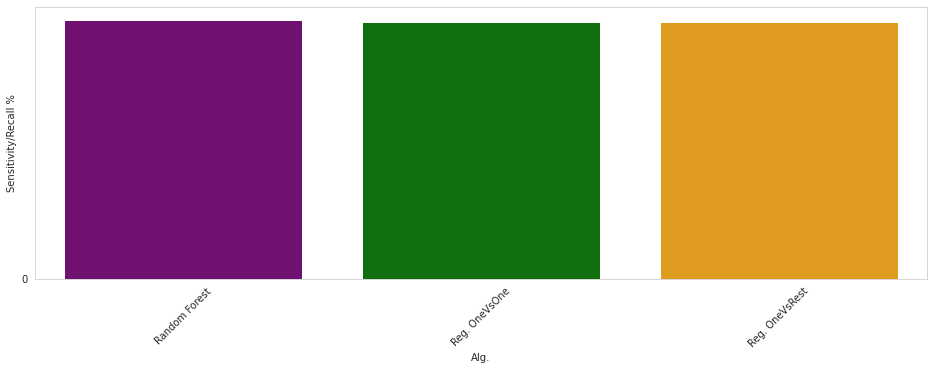

In [40]:
colors = ["purple", "green", "orange"]
sns.set_style("whitegrid")
plt.figure(figsize=(16,5))
plt.yticks(np.arange(0,100,10))
plt.ylabel("Sensitivity/Recall %")
plt.xlabel("Alg.")
plt.xticks(rotation=45)
sns.barplot(x=list(['Random Forest', 'Reg. OneVsOne', 'Reg. OneVsRest']), y=list(performance['Sensitivity/Recall']), palette=colors)
plt.show()


#### Simple approachs
The Random Forest Classifier proved to be the best approach to classify clusters.

# Interpretation of clusters

### Top 10 Municipalities of the clusters with the best Municipal Human Development Index by Literacy Rate, 2000.

In [41]:
df_ibope[df_ibope['kmeans_cluster']==0][['Municipal Human Development Index, 2000', 'Literacy rate, 2000']].reset_index().sort_values(by=['Municipal Human Development Index, 2000', 'Literacy rate, 2000'],ascending=False).head(10)

,Município,"Municipal Human Development Index, 2000","Literacy rate, 2000"
2711,São Caetano do Sul (SP),0.919,97.01
4075,Águas de São Pedro (SP),0.908,97.07
1296,Niterói (RJ),0.886,96.45
5343,Florianópolis (SC),0.875,96.44
2586,Santos (SP),0.871,96.44
3799,Bento Gonçalves (RS),0.870,96.11
4105,Balneário Camboriú (SC),0.867,97.00
4740,Joaçaba (SC),0.866,95.13
5403,Fernando de Noronha (Distrito Estadual) (PE),0.862,93.13
3282,Carlos Barbosa (RS),0.858,96.39


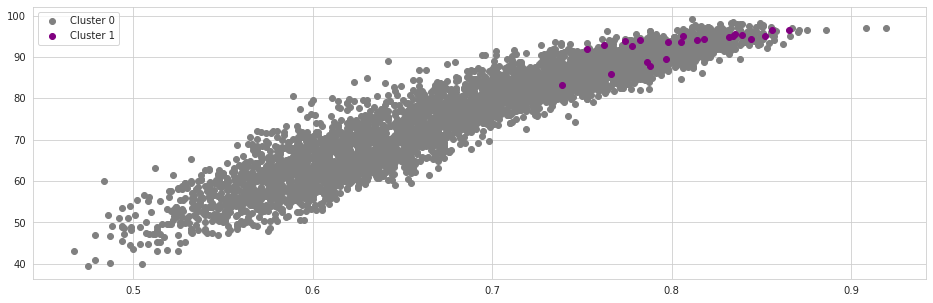

In [42]:
plt.figure(figsize=(16,5))

plt.scatter(x = df_ibope[df_ibope['kmeans_cluster']==0]['Municipal Human Development Index, 2000'] ,y = df_ibope[df_ibope['kmeans_cluster']==0]['Literacy rate, 2000'], color = "gray", label="Cluster 0" )
plt.scatter(x = df_ibope[df_ibope['kmeans_cluster']==1]['Municipal Human Development Index, 2000'] ,y = df_ibope[df_ibope['kmeans_cluster']==1]['Literacy rate, 2000'], color = "purple", label="Cluster 1" )
plt.legend()



### Top 10 Municipalities of clusters with the best Municipal Human Development Index by Income per capita.

Cluster 0 concentrates the highest average of Municipalities with per capita income. Let's look at which Municipalities have the highest per capita income.

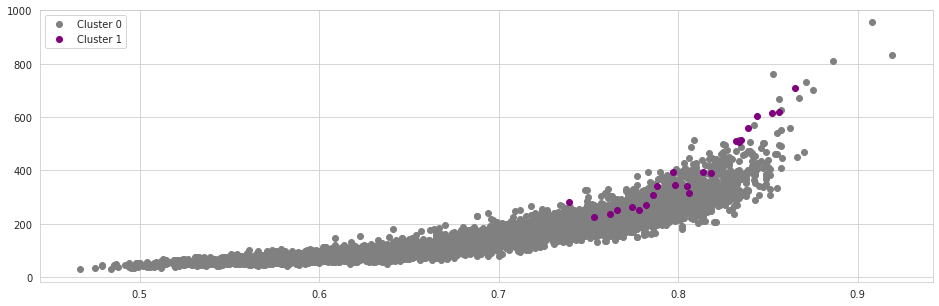

In [43]:
plt.figure(figsize=(16,5))

plt.scatter(x = df_ibope[df_ibope['kmeans_cluster']==0]['Municipal Human Development Index, 2000'] ,y = df_ibope[df_ibope['kmeans_cluster']==0]['Income per Capita, 2000'], color = "gray", label="Cluster 0" )
plt.scatter(x = df_ibope[df_ibope['kmeans_cluster']==1]['Municipal Human Development Index, 2000'] ,y = df_ibope[df_ibope['kmeans_cluster']==1]['Income per Capita, 2000'], color = "purple", label="Cluster 1" )
plt.legend()



note:

- The Gini Index - also known as the Gini Coefficient - is a mathematical instrument used to measure the social inequality of a given country, federative unit or municipality.
- Intensity of indigence - identifies the poor as those who live in extreme poverty

#  Calculate Factor Scores

The factor scores for the i th factor may be estimated as follows:
 
Fi = Wi1 X1 + Wi2 X2 + Wi3 X3 + . . . + Wik Xk

# Creating a Factor Analysis score and choosing the municipalities with the best scores

The score is created based on the value of the variables in the factor * (factor loads).

- Score of **Factor 0** Most Populated Municipalities by adults mostly
- Score of **Factor1** Developed Municipalities

- Score of **Factor 2** Less Developed Municipalities
- Score of **Factor 3** Municipalities far from the capital and / or with a large territorial extension and / or with a large area km (** 2)

In [44]:
##### **Factor 0** Most Populated Municipalities by adults mostly 

def score_factor0( cluster):
    df_ibope['score_factor0_cluster'+str(cluster)] = df_ibope[df_ibope['kmeans_cluster']==cluster]['Population aged 25 or over, 1991'] *loads.T['Population aged 25 or over, 1991'][0] \
    + df_ibope[df_ibope['kmeans_cluster']==cluster]['Population aged 25 or over, 2000']  *loads.T['Population aged 25 or over, 2000'][0] \
    + df_ibope[df_ibope['kmeans_cluster']==cluster]['Population aged 65 and over, 1991']  *loads.T['Population aged 65 and over, 1991'][0] \
    + df_ibope[df_ibope['kmeans_cluster']==cluster]['Population aged 65 and over, 2000']  *loads.T['Population aged 65 and over, 2000'][0] \
    + df_ibope[df_ibope['kmeans_cluster']==cluster]['Total population, 1991']  *loads.T['Total population, 1991'][0] \
    + df_ibope[df_ibope['kmeans_cluster']==cluster]['Total population, 2000']  *loads.T['Total population, 2000'][0] \
    + df_ibope[df_ibope['kmeans_cluster']==cluster]['Urban population, 2000']  *loads.T['Urban population, 2000'][0] \
    + df_ibope[df_ibope['kmeans_cluster']==cluster]['Rural population, 2000']  *loads.T['Rural population, 2000'][0]

score_factor0(0)     
score_factor0(1)    

In [45]:
##### **Factor1 ** Developed Municipalities 

def score_factor1( cluster):
    df_ibope['score_factor1_cluster'+str(cluster)] = df_ibope[df_ibope['kmeans_cluster']==cluster]['Life expectancy at birth, 2000'] * loads.T['Life expectancy at birth, 2000'][1] \
    + df_ibope[df_ibope['kmeans_cluster']==cluster]['Mortality to one year old, 2000'] * loads.T['Mortality to one year old, 2000'][1] \
    + df_ibope[df_ibope['kmeans_cluster']==cluster]['Total fertility rate, 2000'] * loads.T['Total fertility rate, 2000'][1] \
    + df_ibope[df_ibope['kmeans_cluster']==cluster]['Percentage of people aged 25 and over who are illiterate, 2000'] * loads.T['Percentage of people aged 25 and over who are illiterate, 2000'][1] \
    + df_ibope[df_ibope['kmeans_cluster']==cluster]['Income per Capita, 2000'] * loads.T['Income per Capita, 2000'][1] \
    + df_ibope[df_ibope['kmeans_cluster']==cluster]['Intensity of poverty, 2000'] * loads.T['Intensity of poverty, 2000'][1] \
    + df_ibope[df_ibope['kmeans_cluster']==cluster]['Municipal Human Development Index, 2000'] * loads.T['Municipal Human Development Index, 2000'][1] \
    + df_ibope[df_ibope['kmeans_cluster']==cluster]['Literacy rate, 2000'] * loads.T['Literacy rate, 2000'][1] \
    + df_ibope[df_ibope['kmeans_cluster']==cluster]['Average years of schooling for people aged 25 or over, 2000'] * loads.T['Average years of schooling for people aged 25 or over, 2000'][1]
score_factor1(0)       
score_factor1(1)

In [46]:
def score_factor2( cluster):
    df_ibope['score_factor2_cluster'+str(cluster)] = df_ibope[df_ibope['kmeans_cluster']==cluster]['Intensity of indigence, 2000'] * loads.T['Intensity of indigence, 2000'][2] \
    + df_ibope[df_ibope['kmeans_cluster']==cluster]['Intensity of poverty, 2000'] * loads.T['Intensity of poverty, 2000'][2]
score_factor2(0)       
score_factor2(1)

In [47]:
def score_factor3( cluster):
    df_ibope['score_factor3_cluster'+str(cluster)] = df_ibope[df_ibope['kmeans_cluster']==cluster]['Área (km²)'] * loads.T['Área (km²)'][3]
      
score_factor3(0)       
score_factor3(1)

# Highest scores of **Factor 0** Most Populated Municipalities by adults mostly  per cluste.

# SSL+ FA
- **Step 1:** Labeling data with Cluster Approach - **Done**
- **Step 2:** Validation of Classification - **Done**
- **Step 1.1:** Apply FA in entire data - **Done**
- **Step 1.2:**  Use FA scores for interpret clusters - **We're here**



In [48]:
df_ibope[['score_factor0_cluster0' ]].reset_index().sort_values(by=['score_factor0_cluster0','Município'],ascending=False).head(5)


,Município,score_factor0_cluster0
4748,João Pessoa (PB),2.264563e+06
4712,Jaboatão dos Guararapes (PE),2.157641e+06
2564,São José dos Campos (SP),2.033470e+06
3178,Contagem (MG),2.025868e+06
1373,Ribeirão Preto (SP),1.994724e+06


In [49]:
df_ibope[['score_factor0_cluster1' ]].reset_index().sort_values(by=['score_factor0_cluster1','Município'],ascending=False).head(5)


,Município,score_factor0_cluster1
5493,Salvador (BA),9.255725e+06
5504,Belo Horizonte (MG),8.920685e+06
5486,Fortaleza (CE),8.021092e+06
5502,Brasília (DF),7.434147e+06
5491,Curitiba (PR),6.137223e+06


# Highest scores of **Factor 1** Municipalities Developed by cluster

In [50]:
df_ibope[['score_factor1_cluster0' ]].reset_index().sort_values(by=['score_factor1_cluster0','Município'],ascending=False).head(5)


,Município,score_factor1_cluster0
4075,Águas de São Pedro (SP),972.800887
2711,São Caetano do Sul (SP),852.417376
1296,Niterói (RJ),825.634081
2147,Santana de Parnaíba (SP),756.308543
2586,Santos (SP),744.806145


In [51]:
df_ibope[['score_factor1_cluster1' ]].reset_index().sort_values(by=['score_factor1_cluster1','Município'],ascending=False).head(5)


,Município,score_factor1_cluster1
5489,Porto Alegre (RS),730.947670
5491,Curitiba (PR),648.165619
5483,Campinas (SP),641.956901
5502,Brasília (DF),628.712763
5504,Belo Horizonte (MG),586.393222


# Highest scores on **Factor 2** Least Developed Municipalities per cluster.

In [52]:
df_ibope[['score_factor2_cluster0' ]].reset_index().sort_values(by=['score_factor2_cluster0','Município'],ascending=False).head(5)


,Município,score_factor2_cluster0
1984,Uiramutã (RR),101.184537
1291,Normandia (RR),100.093807
2698,São Gabriel da Cachoeira (AM),97.203374
3085,Buritirama (BA),96.332082
3915,Betânia do Piauí (PI),95.119911


In [53]:
df_ibope[['score_factor2_cluster1' ]].reset_index().sort_values(by=['score_factor2_cluster1','Município'],ascending=False).head(5)


,Município,score_factor2_cluster1
5488,Santo André (SP),78.695399
5485,São Bernardo do Campo (SP),77.213176
5501,Guarulhos (SP),76.822207
5483,Campinas (SP),76.447603
5503,Osasco (SP),75.354002


# Final Report

###  Which groups of municipalities should be the gateway to a company in the country? Why?


##### **Factor 0** Most Populated Municipalities by adults mostly .
##### **Factor1 ** Developed Municipalities.
 We want to choose hifg scores for factor 0,1. 
       
##### **Factor 2** Less Developed Municipalities - Municipalities with high factor score for this factor can be indicative of not choose for the company.

Some good choices:

- Salvador (BA), Belo Horizonte (MG), Fortaleza (CE)


- Águas de São Pedro (SP), São Caetano do Sul (SP), Niterói (RJ), Santana de Parnaíba (SP), Santos (SP)	


- step 1: Labeling data with Cluster Approach  ->  step 2: Validation of Classification  ->  step 2.2: Use FA scores for interpret new classification entries.
-                              ```step 1: Labeling data with Cluster Approach  ->  step 1.1: Apply FA in entire data  ->  step 1.2: Use FA scores for interpret clusters
``` 





### References
- https://www.kaggle.com/shrutimechlearn/step-by-step-kmeans-explained-in-detail
- https://www.datacamp.com/community/tutorials/introduction-factor-analysis
- https://devopedia.org/factor-analysis
- https://towardsdatascience.com/factor-analysis-a-complete-tutorial-1b7621890e42
- https://en.wikipedia.org/wiki/Factor_analysis#
